In [83]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import kagglehub
from scipy.io import loadmat

In [89]:
path = kagglehub.dataset_download("avnishnish/mnist-original")
data_raw = loadmat(f"{path}/mnist-original.mat")
print(data_raw.keys())

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])


In [ ]:
data_raw['data'].shape

(784, 70000)

In [ ]:
data_raw['label'].shape

(1, 70000)

In [ ]:
mnist = {
    'data':data_raw['data'].T,
    'target':data_raw['label'][0], #select first row of element
}

In [ ]:
mnist['data'].shape

(70000, 784)

In [ ]:
data_raw['data'].shape

(784, 70000)

In [ ]:
mnist['target'].shape

(70000,)

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(mnist['data'],mnist['target'],random_state=0)

In [ ]:
print("Before :",X_train.shape)

Before : (52500, 784)


In [ ]:
pca=PCA(.95) #95% from total features
data=pca.fit_transform(X_train)

result = pca.inverse_transform(data)#tranform data forma back, and it already changed size

print("After :",data.shape)
print("Result :",result.shape)

After : (52500, 43)
Result : (52500, 784)


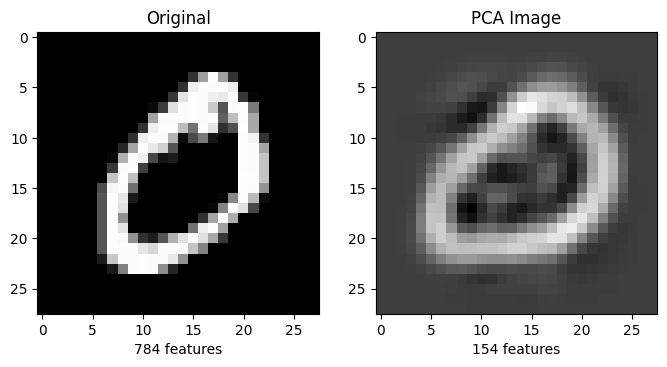

In [92]:
#show image
plt.figure(figsize=(8,4))

#image 784 features
plt.subplot(1,2,1)
plt.imshow(mnist['data'][0].reshape(28,28),cmap=plt.cm.gray,interpolation="nearest")
plt.xlabel("784 features")
plt.title("Original")

#image 154 features (95%)
plt.subplot(1,2,2)
plt.imshow(result[0].reshape(28,28),cmap=plt.cm.gray,interpolation="nearest")
plt.xlabel("154 features")
plt.title("PCA Image")
plt.show()